## Principle of minimum total potential energy with trial function ##

In [1]:
import sympy as sp

In [2]:
EA_0, a, x, L, F = sp.symbols('EA_0, a, x, L, F')

In [3]:
EA = 2 * EA_0 / (2 - x / L)
u_trial = a * (1 - x / L)

In [4]:
eps_trial = u_trial.diff(x)
Ev = sp.simplify(sp.integrate( EA * eps_trial**2 / 2,(x,0,L)))
display(Ev)

EA_0*a**2*log(2)/L

In [5]:
V = Ev  - F * u_trial.subs(x,0)
display(V)

EA_0*a**2*log(2)/L - F*a

In [6]:
eq1 = sp.Eq(sp.diff(V,a),0)
display(eq1)

Eq(2*EA_0*a*log(2)/L - F, 0)

F*L*(1 - x/L)/(2*EA_0*log(2))

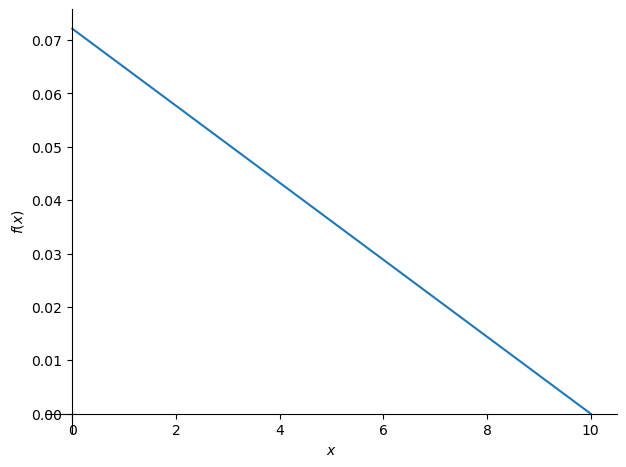

In [7]:
a_sol = sp.solve(eq1,a)[0]
u_trial_subs = u_trial.subs(a,a_sol)
display(u_trial_subs)
sp.plot(u_trial_subs.subs([(F,10),(EA_0,1000),(L,10)]), (x , 0 , 10),label='Result $u_{trial}$');

## ODE ##

In [8]:
u = sp.symbols('u',cls=sp.Function)
EA = 2 * EA_0 / (2 - x / L)

In [9]:
DV = sp.Eq((EA*u(x).diff(x)).diff(x),0)
display(DV)

Eq(2*EA_0*Derivative(u(x), (x, 2))/(2 - x/L) + 2*EA_0*Derivative(u(x), x)/(L*(2 - x/L)**2), 0)

In [10]:
C1, C2 = sp.symbols('C1, C2')
u_sol = sp.dsolve(DV,u(x)).rhs
display(u_sol)

C1 + 2*C2*L*x - C2*x**2/2

3*F*L/(4*EA_0) - F*x/EA_0 + F*x**2/(4*EA_0*L)

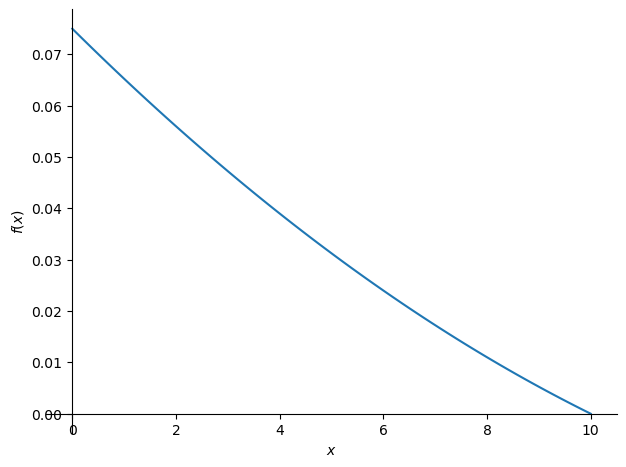

In [11]:
eps = u_sol.diff(x)
N = EA * eps
eq1 = sp.Eq(N.subs(x,0),-F)
eq2 = sp.Eq(u_sol.subs(x,L),0)
sol = sp.solve((eq1,eq2),(C1,C2))
u_subs = u_sol.subs(sol)
display(u_subs)
sp.plot(u_subs.subs([(F,10),(EA_0,1000),(L,10)]), (x , 0 , 10),label='Result $u_{ODE}$');

## Comparison 

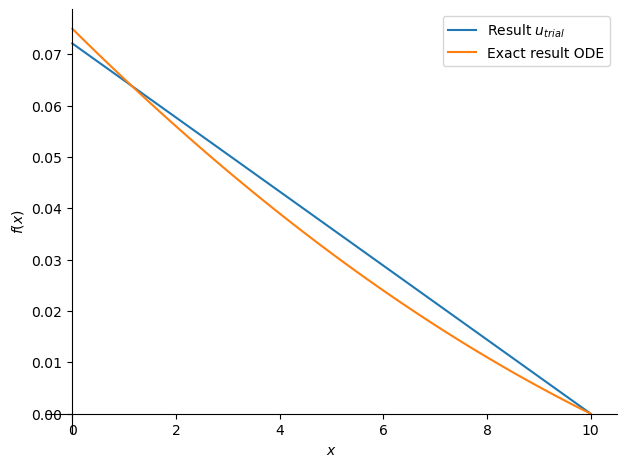

In [12]:
p0 = sp.plot(u_trial_subs.subs([(F,10),(EA_0,1000),(L,10)]), (x , 0 , 10),label='Result $u_{trial}$',legend=True,show=False)
p1 = sp.plot(u_subs.subs([(F,10),(EA_0,1000),(L,10)]), (x , 0 , 10),label='Exact result ODE',show=False)
p0.append(p1[0])
p0.show()